In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = df.load_data()     # loading the Dataset

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

#### Shape of splitted Datasets

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### There are 70,000 images in the whole dataset Each Image having size of 28*28

#### Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

In [ ]:
print("Maximum value in the given data instance: ",x_train[0].max())
print("Minimum value in the given data instance: ",x_train[0].min())

Maximum value in the given data instance:  255
Minimum value in the given data instance:  0


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
distinct_values = np.unique(y_train)
distinct_values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## 1. There are total 10 classes in the dataset


#### Labels

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [ ]:
classes = ["T-shirt/top","Trouser",'Pullover','Dress',"Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
print(x_train.shape[1:])

(28, 28)


## 2. The Dimension of Each Image is:  (28, 28)

Actual image:  Ankle boot


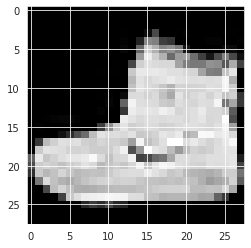

In [ ]:
print("Actual image: ",classes[y_train[0]])
plt.imshow(x_train[0],cmap="gray")
plt.show()

In [ ]:
(x,id) = np.unique(y_train, return_index=True)
print(x)
print(id)

[0 1 2 3 4 5 6 7 8 9]
[ 1 16  5  3 19  8 18  6 23  0]


## 3.Images From Each Class--->

Actual Image----------->  T-shirt/top



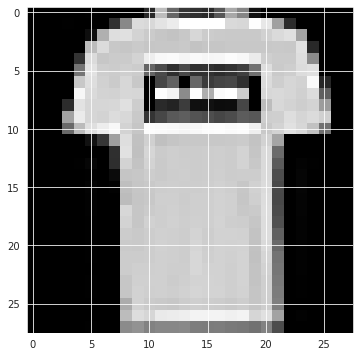


Actual Image----------->  Trouser



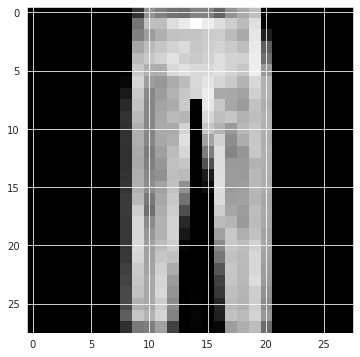


Actual Image----------->  Pullover



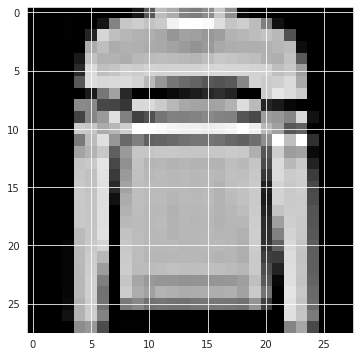


Actual Image----------->  Dress



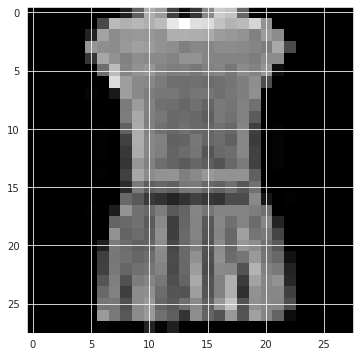


Actual Image----------->  Coat



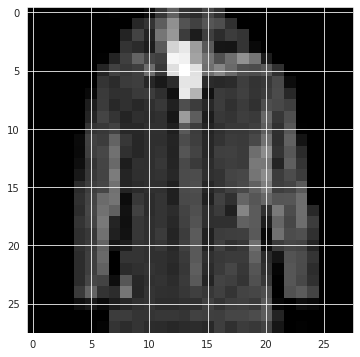


Actual Image----------->  Sandal



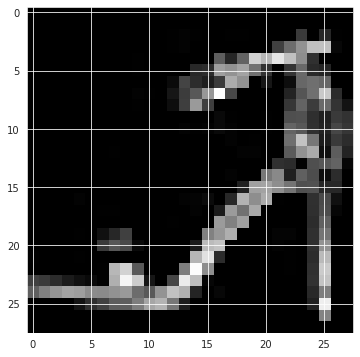


Actual Image----------->  Shirt



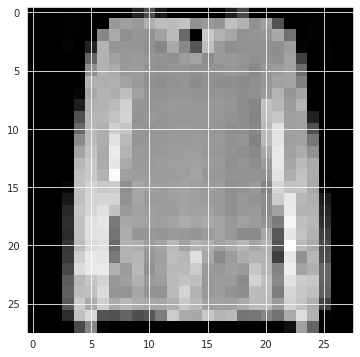


Actual Image----------->  Sneaker



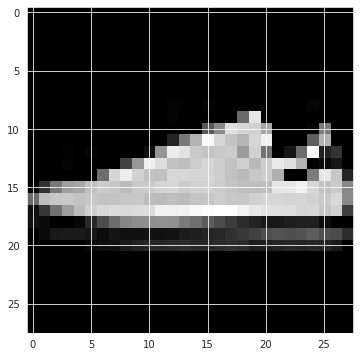


Actual Image----------->  Bag



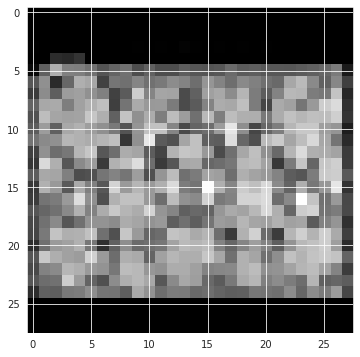


Actual Image----------->  Ankle boot



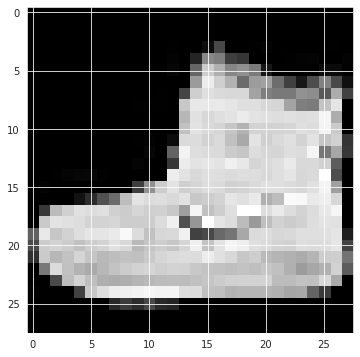

In [ ]:
for i in range(10):
  print("Actual Image-----------> ",classes[y_train[id[i]]])
  print()
  plt.figure(figsize = (6,6))
  plt.imshow(x_train[id[i]],cmap="gray")
  plt.show()
  print()
 

### Normalization Of the Data:
##### Normalizing image step is required which ensures that each input parameter pixels has a similar data distribution. This makes convergence faster while training the network.

#### Method:1 (Min-Max Normalization)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
# Aftre Normalization
print("Maximum value in the given data instance: ",x_train[0].max())
print("Minimum value in the given data instance: ",x_train[0].min())

Maximum value in the given data instance:  1.0
Minimum value in the given data instance:  0.0


In [ ]:
x_train[:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### Building a simple Neural Network

### Model with 2 Hidden Layers

In [ ]:
x_train.shape[1:3]

(28, 28)

In [ ]:
#Sequential groups the Dense layers

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:3],name ="Input_Layer"))  # Flatten ensures that the inputted image which is in 2-d it will flatten it to 1-D.
model1.add(tf.keras.layers.Dense(530,activation = "relu",name = "Hidden_Layer_1"))
model1.add(tf.keras.layers.Dense(340,activation = "relu",name = "Hidden_Layer_2"))
model1.add(tf.keras.layers.Dense(10,activation = "softmax",name = "Output_Layer"))


# softmax activation function is used in the output layer if there are more than 2 labels as our target

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
## we use sparse_categorical_crossentropy loss function when there are two or more label classes.

In [ ]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 530)               416050    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 340)               180540    
                                                                 
 Output_Layer (Dense)        (None, 10)                3410      
                                                                 
Total params: 600,000
Trainable params: 600,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(x_train,y_train,epochs =15,batch_size=32,validation_split = 0.1)

Epoch 1/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4740 - accuracy: 0.8276 - val_loss: 0.3974 - val_accuracy: 0.8568
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3598 - accuracy: 0.8668 - val_loss: 0.3951 - val_accuracy: 0.8575
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3239 - accuracy: 0.8796 - val_loss: 0.3488 - val_accuracy: 0.8735
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2961 - accuracy: 0.8890 - val_loss: 0.3389 - val_accuracy: 0.8760
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.8949 - val_loss: 0.3103 - val_accuracy: 0.8842
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2653 - accuracy: 0.8997 - val_loss: 0.3162 - val_accuracy: 0.8852
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2501 - accuracy: 0.9047 - val_loss: 0.3441 - val_accuracy:

In [ ]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3517 - accuracy: 0.8938


[0.3516777753829956, 0.8938000202178955]

In [ ]:
y_pred1 = model1.predict(x_test,batch_size = 32)
y_pred1 = np.argmax(y_pred1, axis=1)
# argmax Returns the indices of the maximum values along an axis.
y_pred1

array([9, 2, 1, ..., 8, 1, 5])

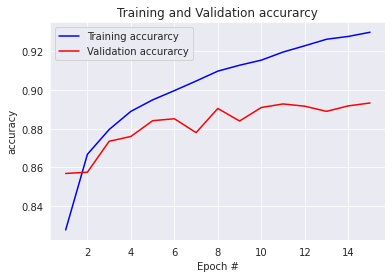

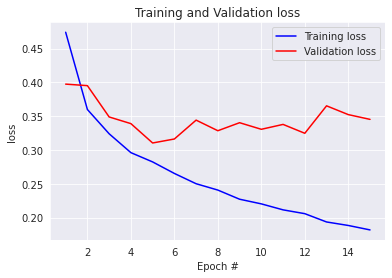

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history1 object
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


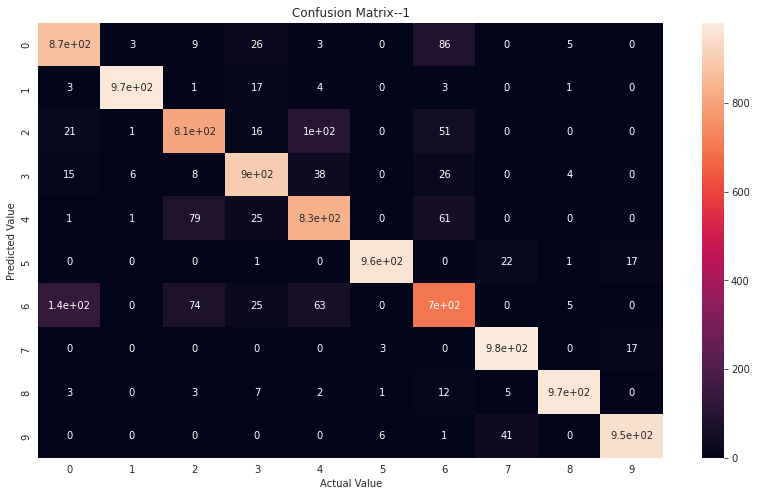

In [ ]:
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report
cm1 = confusion_matrix(y_test,y_pred1)
plt.figure(figsize = (14,8))
sns.heatmap(cm1,annot = True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Confusion Matrix--1")
plt.show()

In [ ]:
print("classification_report--1 : ")
print(classification_report(y_test,y_pred1))

classification_report--1 : 
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.81      0.81      1000
           3       0.89      0.90      0.89      1000
           4       0.80      0.83      0.81      1000
           5       0.99      0.96      0.97      1000
           6       0.74      0.70      0.72      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
print("Accuracy Score for model--1: ",accuracy_score(y_test,y_pred1))                                                     

Accuracy Score for model--1:  0.8938


## Model with 5 Hidden Layers

In [ ]:
#Sequential groups the Dense layers

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:3],name ="Input_Layer"))  # Flatten ensures that the inputted image which is in 2-d it will flatten it to 1-D.
model2.add(tf.keras.layers.Dense(530,activation = "relu",name = "Hidden_Layer_1"))
model2.add(tf.keras.layers.Dense(360,activation = "relu",name = "Hidden_Layer_2"))
model2.add(tf.keras.layers.Dense(250,activation = "relu",name = "Hidden_Layer_3"))
model2.add(tf.keras.layers.Dense(180,activation = "relu",name = "Hidden_Layer_4"))
model2.add(tf.keras.layers.Dense(130,activation = "relu",name = "Hidden_Layer_5"))
model2.add(tf.keras.layers.Dense(10,activation = "softmax",name = "Output_Layer"))


# softmax activation function is used in the output layer if there are more than 2 labels as our target



In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
## we use sparse_categorical_crossentropy loss function when there are two or more label classes.



In [ ]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 530)               416050    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 360)               191160    
                                                                 
 Hidden_Layer_3 (Dense)      (None, 250)               90250     
                                                                 
 Hidden_Layer_4 (Dense)      (None, 180)               45180     
                                                                 
 Hidden_Layer_5 (Dense)      (None, 130)               23530     
                                                                 
 Output_Layer (Dense)        (None, 10)               

In [ ]:
history2 = model2.fit(x_train,y_train,epochs =15,batch_size=32,validation_split = 0.1)

Epoch 1/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5132 - accuracy: 0.8129 - val_loss: 0.4207 - val_accuracy: 0.8485
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3822 - accuracy: 0.8616 - val_loss: 0.3924 - val_accuracy: 0.8572
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3475 - accuracy: 0.8724 - val_loss: 0.3589 - val_accuracy: 0.8753
Epoch 4/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3207 - accuracy: 0.8831 - val_loss: 0.3222 - val_accuracy: 0.8805
Epoch 5/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3037 - accuracy: 0.8879 - val_loss: 0.3575 - val_accuracy: 0.8808
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2857 - accuracy: 0.8945 - val_loss: 0.3986 - val_accuracy: 0.8670
Epoch 7/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2737 - accuracy: 0.8995 - val_loss: 0.3443 - val_accuracy:

In [ ]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3665 - accuracy: 0.8867


[0.36653807759284973, 0.8866999745368958]

In [ ]:
y_pred2 = model2.predict(x_test,batch_size = 32)
y_pred2 = np.argmax(y_pred2, axis=1)
# argmax Returns the indices of the maximum values along an axis.
y_pred2


array([9, 2, 1, ..., 8, 1, 5])

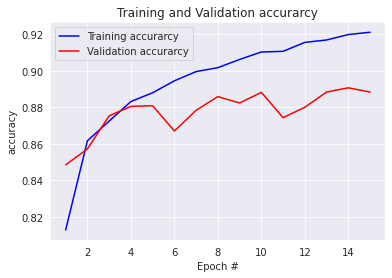

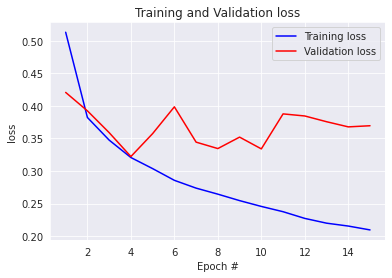

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history1 object
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()




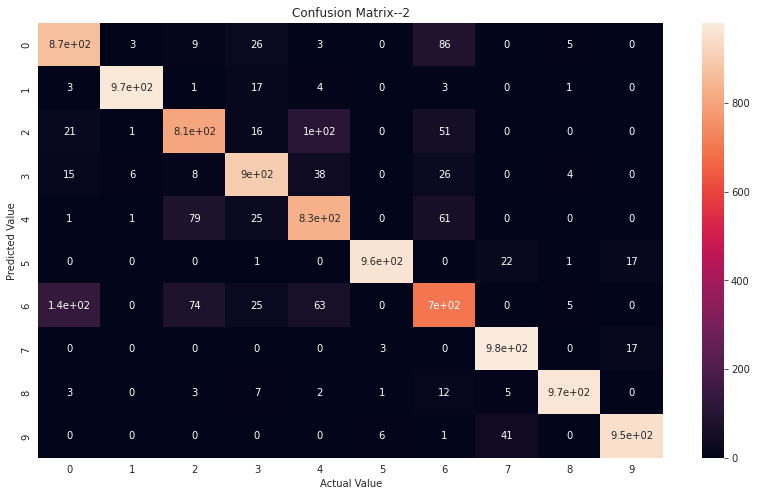

In [ ]:

from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report
cm2 = confusion_matrix(y_test,y_pred1)
plt.figure(figsize = (14,8))
sns.heatmap(cm2,annot = True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Confusion Matrix--2")
plt.show()

In [ ]:
print("classification_report--2 : ")
print(classification_report(y_test,y_pred2))

classification_report--2 : 
              precision    recall  f1-score   support

           0       0.87      0.79      0.82      1000
           1       1.00      0.97      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.90      0.90      0.90      1000
           4       0.80      0.82      0.81      1000
           5       0.94      0.98      0.96      1000
           6       0.68      0.72      0.70      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
print("Accuracy Score for model--2: ",accuracy_score(y_test,y_pred2))

Accuracy Score for model--2:  0.8867


### From the above two models
- Model with 5 Hidden Layers has relatively higher accurcy than the Model with 2 Hidden Layers these may change by varying the number of hidden activation  units in each hidden layers


### Model2 is better than Model1